In [1]:
from skin_data import (
    SkinData, 
    simulate_skin_data, 
    print_skin_data, 
    find_highest_pressure,
    apply_Knn,
    reorder_clusters,
    apply_KMC, 
    get_cluster_metrics,
    stringfy_set,
    fill_canvas
)
from tactile_objects import (
    TactileObjects,
    TactileObjectsTask
)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import neighbors, cluster, decomposition
import sklearn.metrics as sm
from itertools import permutations
import numpy as np
import math
import time
from experiment_setup import ExperimentSetup
import cv2

%matplotlib inline
%matplotlib nbagg

### load data

In [2]:
def plt_snapshot(snapshot):
    plt.close('all')
    fig = plt.figure(figsize=(13, 8))
    ax = fig.add_subplot(111)
    ax.imshow(snapshot, cmap='hot', interpolation='bicubic')
    return fig

def remove_canvas(skin_array):
    mid = math.floor(skin_array.shape[1]/2)
    return  np.concatenate((skin_array[0, mid-2:mid+2] ,
            skin_array[1, mid-3:mid+2] ,
            skin_array[2, mid-3:mid+3] ,
            skin_array[3, mid-4:mid+3] ,
            skin_array[4, mid-4:mid+4] ,
            skin_array[5, mid-4:mid+4] ,
            skin_array[6, mid-4:mid+3] ,
            skin_array[7, mid-3:mid+3] ,
            skin_array[8, mid-3:mid+2] ,
            skin_array[9, mid-2:mid+2]), axis=0)

<IPython.core.display.Javascript object>


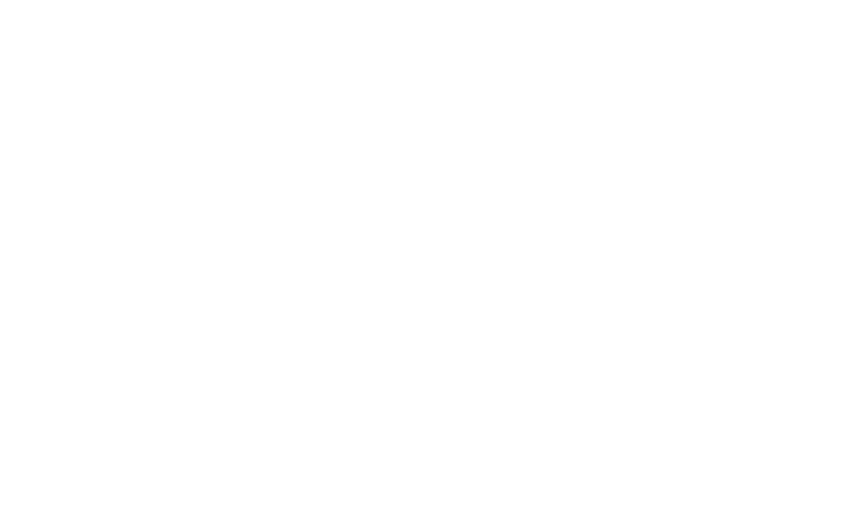

<IPython.core.display.Javascript object>


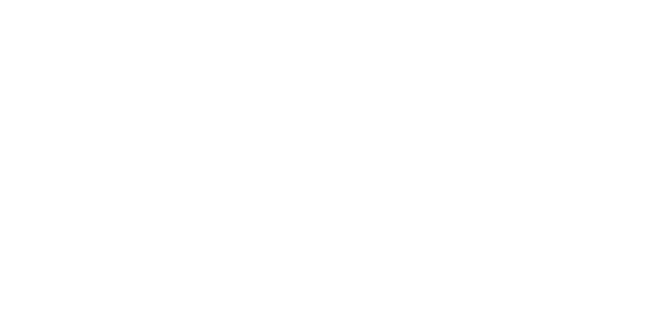

<IPython.core.display.Javascript object>


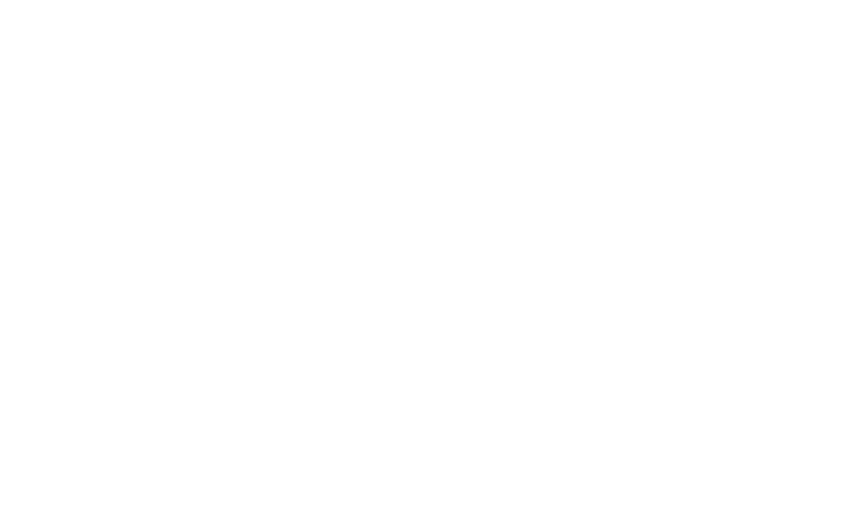

<IPython.core.display.Javascript object>


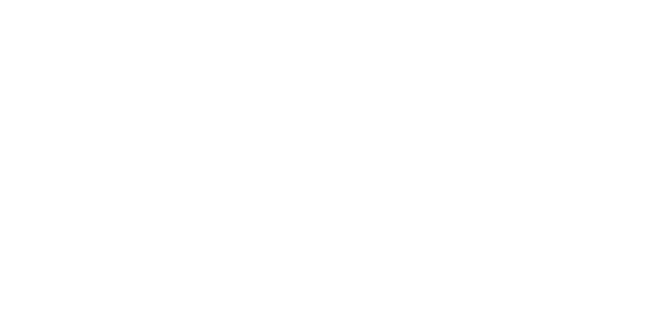

<IPython.core.display.Javascript object>


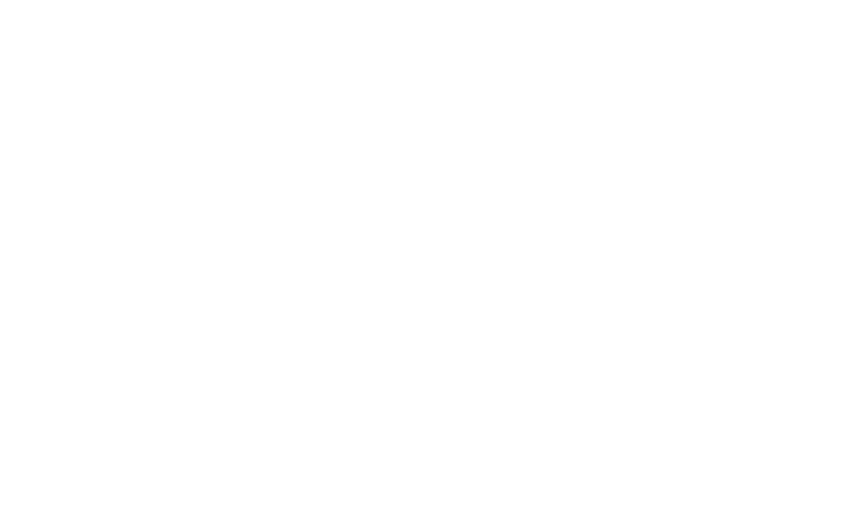

<IPython.core.display.Javascript object>


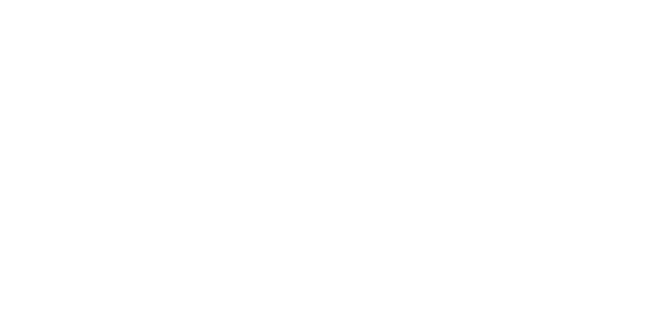

<IPython.core.display.Javascript object>


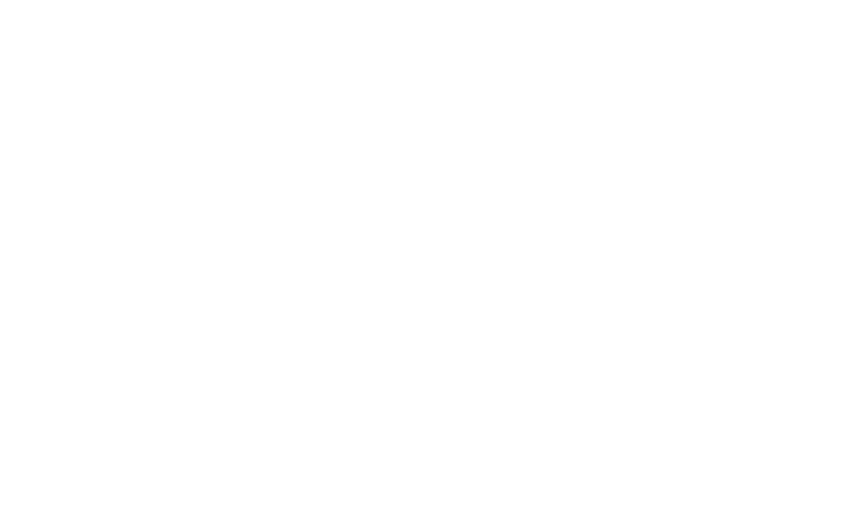

<IPython.core.display.Javascript object>


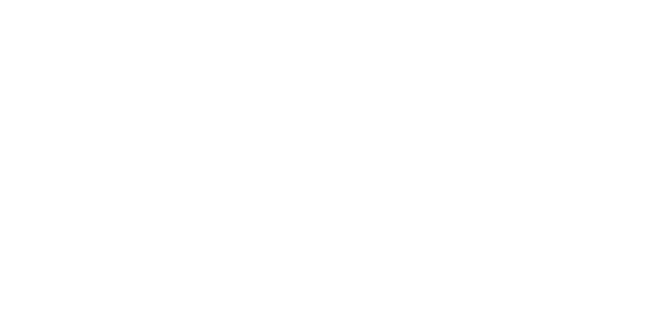

<IPython.core.display.Javascript object>


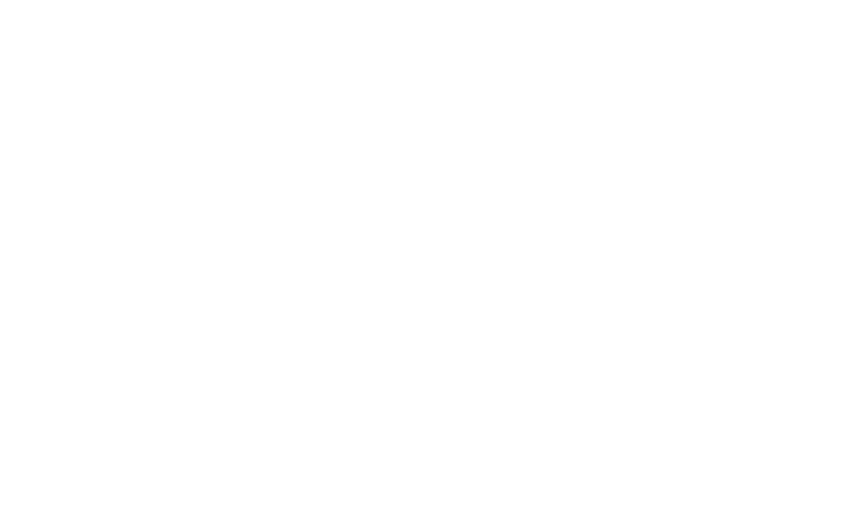

<IPython.core.display.Javascript object>


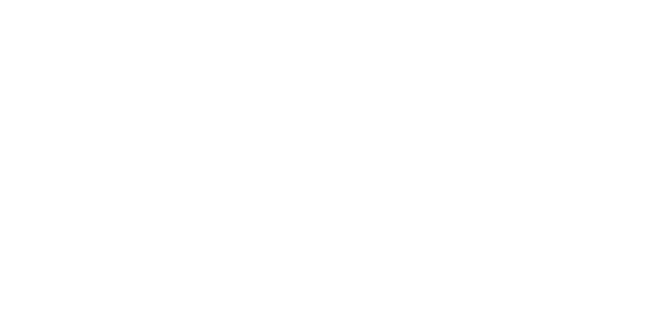

<IPython.core.display.Javascript object>


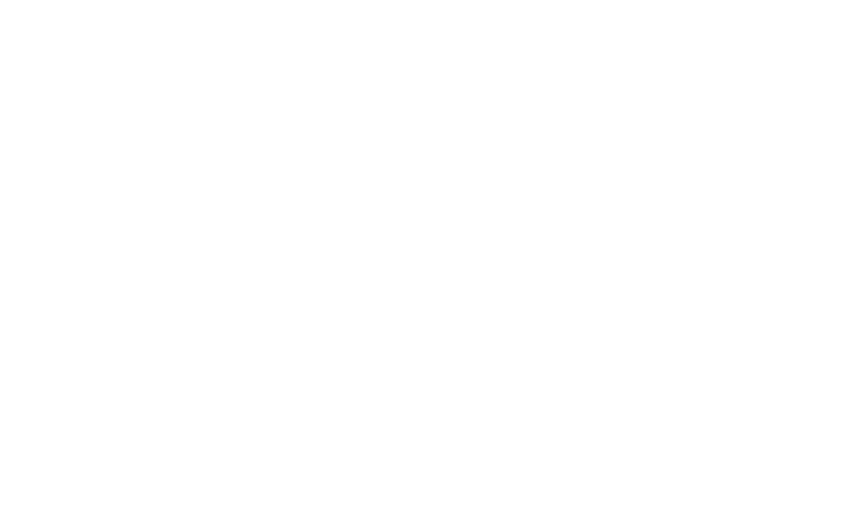

<IPython.core.display.Javascript object>


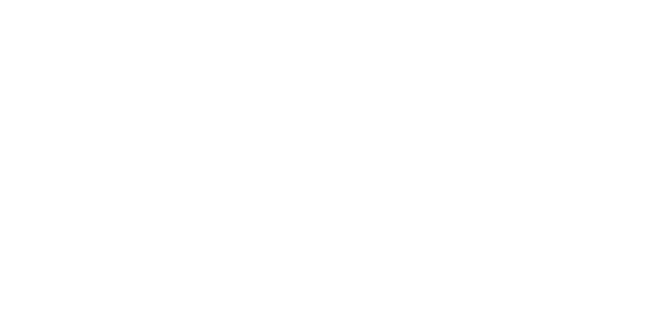

<IPython.core.display.Javascript object>


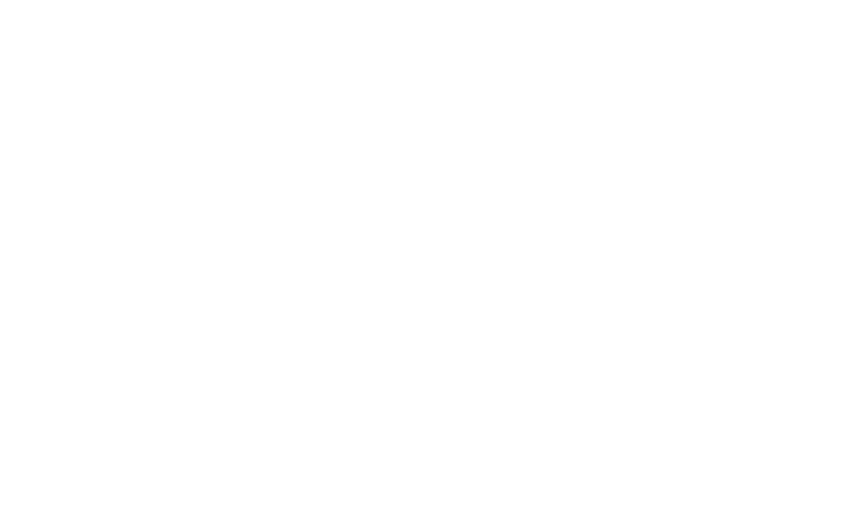

<IPython.core.display.Javascript object>


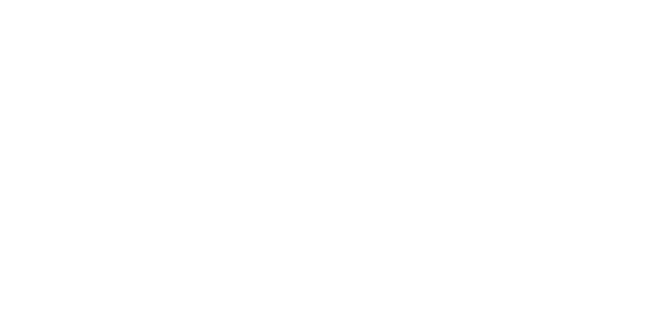

In [13]:
exp_setup = ExperimentSetup("./../data/skin_experiments.mat", best_pressure_time=140)
all_exp_data = exp_setup.get_experiment_data()
exp_data = all_exp_data['6mil']

skin_canvas = np.zeros((10, 10))
k1 = np.array([[1,0,-1],
               [1,0,-1],
               [1,0,-1]x]) 
k2 = np.array([[1,1,1],
               [0,0,0],
               [-1,-1,-1]])
for i in range(exp_data.shape[0]):
    skin_array = fill_canvas(skin_canvas, exp_data[i,:].reshape(6,10))
    filtered_skin_array = cv2.filter2D(src=skin_array, kernel=k1, ddepth=-1)
    filtered_exp_data = remove_canvas(filtered_skin_array)
    exp_data[i,:] = filtered_exp_data.reshape(1,-1)
    
all_exp_data['6mil'] = exp_data
exp_setup.set_experiment_data(all_exp_data)
exp_setup.run_experiment(experiment_name='6mil', which_clustering='k_means', show=True, save=True)